In [1]:
import pickle
import pandas as pd
import numpy as np
from statsbombpy import sb
import seaborn as sns
import matplotlib.pyplot as plt
from one_two.functions import get_team_info, plot_one_two_heatmaps, get_player_one_twos
pd.set_option("display.max_columns", None)

In [2]:
with open("data/WSL_20_21_all_one_twos.pickle", "rb") as f:
    one_twos = pickle.load(f)

In [3]:
# put it in a single df
one_twos_aggregated = pd.DataFrame([])
for key in one_twos.keys():
    one_twos_aggregated = pd.concat([one_twos_aggregated, one_twos[key]], axis=0)

In [4]:
# split into opening and closing passes
open_agg = one_twos_aggregated.iloc[::2, :]

close_agg = one_twos_aggregated.iloc[1::2, :]

In [5]:
open_counts = open_agg.player.value_counts()
open_counts = open_counts.reset_index()

# add team info
open_counts = get_team_info(open_counts, open_agg)

close_counts = close_agg.player.value_counts()
close_counts = close_counts.reset_index()

close_counts = get_team_info(close_counts, close_agg)


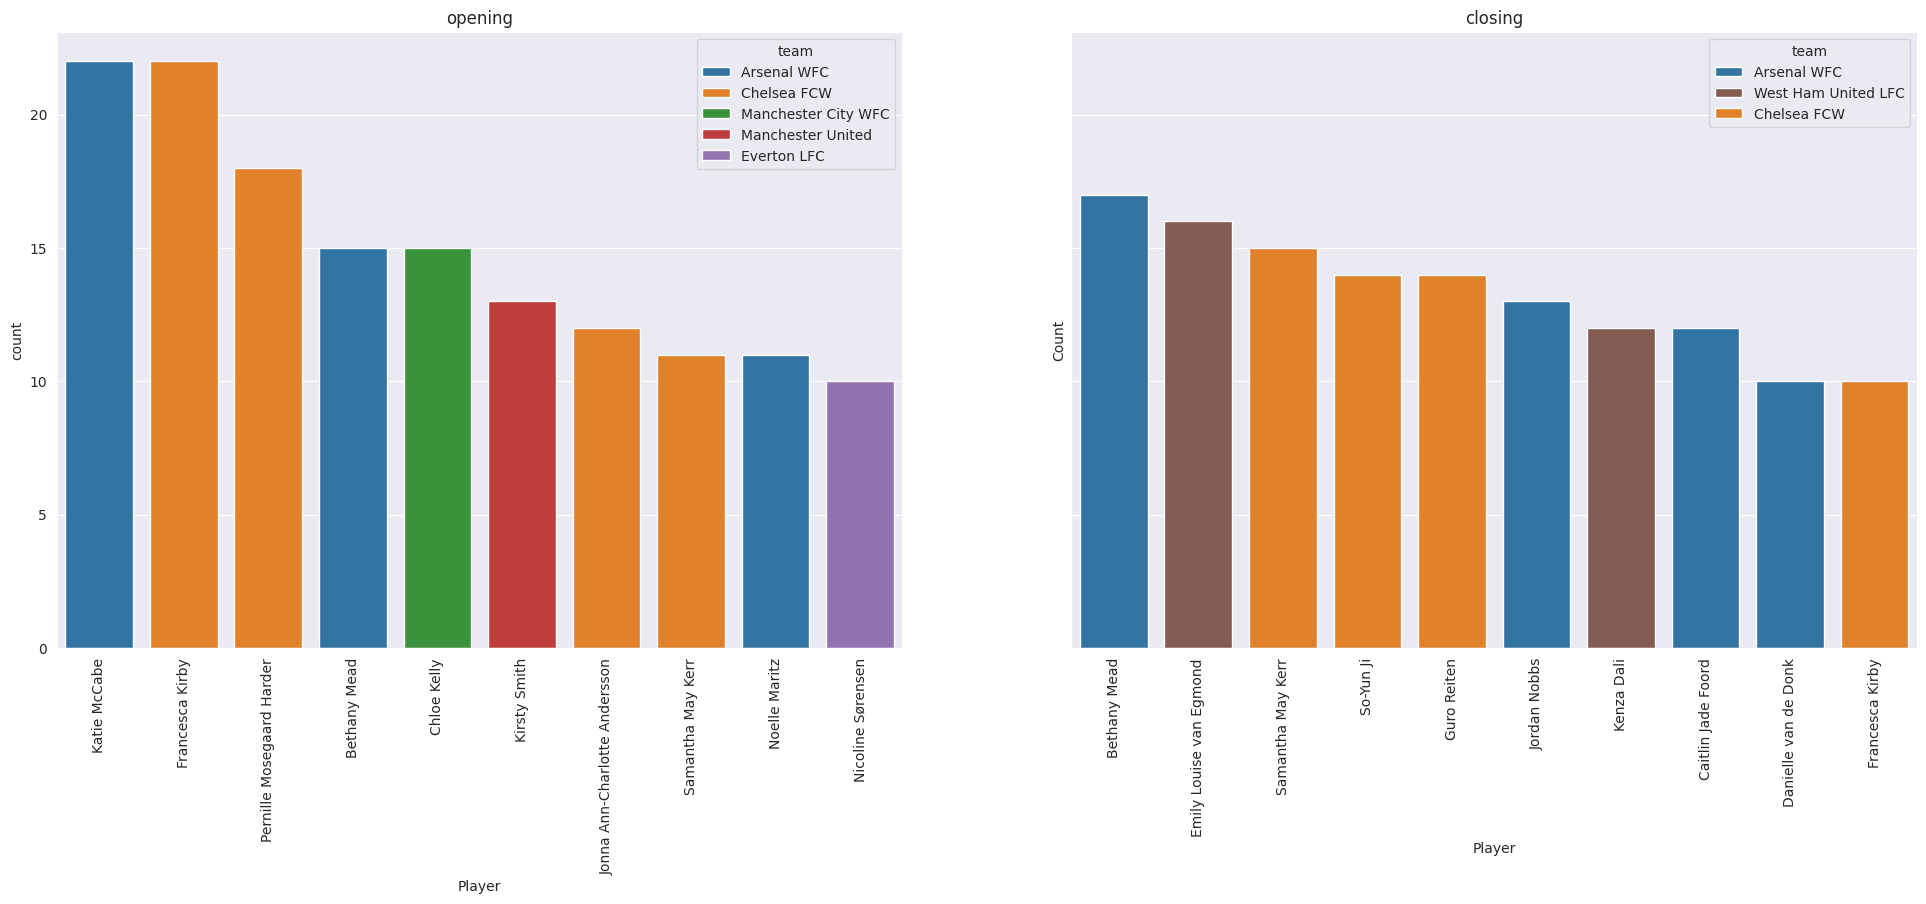

In [6]:
# plot open and close in subplots - TOP 10 only

open_10 = open_counts.iloc[:10, :]
close_10 = close_counts.iloc[:10, :]

fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(24,8))
# plt.title("Players With Most One-Two Passes Per Team (WSL 20/21)")

# make color dict
unique = open_counts["team"].unique()
palette = dict(zip(unique, sns.color_palette(n_colors=len(unique))))

sns.barplot(x="player", y="count", data=open_10, hue="team", palette=palette, ax=ax[0], dodge=False)
ax[0].set_title("opening")
sns.barplot(x="player", y="count", data=close_10, hue="team", palette=palette, ax=ax[1], dodge=False)
ax[1].set_title("closing")
plt.ylabel("Count")
ax[0].set_xlabel("Player")
ax[1].set_xlabel("Player")
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
plt.show()

In [7]:
# ONLY BETH MEAD APPEARS IN TOP 5 FOR BOTH

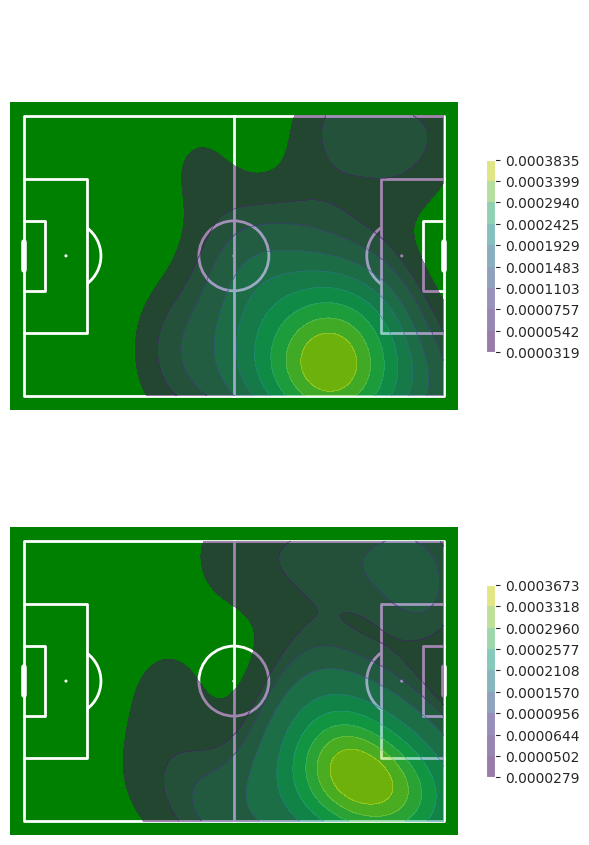

In [8]:
# plot heatmap for beth mead

# make df of 1-2's for BM
idx = []
for i in range(len(one_twos_aggregated)):
    player1 = one_twos_aggregated["player"].iloc[i]
    player2 = one_twos_aggregated["pass_recipient"].iloc[i]

    if player1 == "Bethany Mead" or player2 == "Bethany Mead":
        idx.append(i)

BM_data = one_twos_aggregated.iloc[idx,:]

plot_one_two_heatmaps(data=BM_data, competition="WSL", season="2021", team="BM")

In [ ]:
for player in open_10.player:


In [ ]:


plot_one_two_heatmaps(data=FK_data, competition="WSL", season="2021", team="FK")